## Buisiness Undesrstanding
This part will be common to all 3 questions at hand, and the other steps of data mining process may be  described in detail per each question.

### Project objectives
* To better understands trends in the IT industry such as: levels of formal education of those who work in the field, mean salary destribution over the years and programming language popularity over the years.
* To draw conclusions based on forementioned trends regarding the situation in the IT industry.

### Steps to make
* Acquiring the data.
* Performing necessary cleaning and primary preparation of data per each year.
* Combining the results of each year.
* Visualizing the combined data.

### Criteria of success
* To obtain clearly visualized data, regarding the questions of interest.
* Be able to draw conclusions from that data.

### Available resources
* Jupyter notebook 
* Python 3 with it's libraries:
  - Pandas and Numpy for manipulating datasets
  - Matplotlib and Seaborn for visualization of data
* The results of Stack Overflow annual surveys in the form of CSV files

========================================================================================
### Gathering the data

In [173]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Download all necessary data
df2014 = pd.read_csv('./developer_survey_2014/2014 Stack Overflow Survey Responses.csv', low_memory=False)
df2015 = pd.read_csv('./developer_survey_2015/2015 Stack Overflow Developer Survey Responses.csv', header=1, low_memory=False)
df2016 = pd.read_csv('./developer_survey_2016/2016 Stack Overflow Survey Responses.csv', low_memory=False)
df2017 = pd.read_csv('./developer_survey_2017/survey_results_public.csv', low_memory=False)
df2018 = pd.read_csv('./developer_survey_2018/survey_results_public.csv', low_memory=False)
df2019 = pd.read_csv('./developer_survey_2019/survey_results_public.csv', low_memory=False)
df2020 = pd.read_csv('./developer_survey_2020/survey_results_public.csv', low_memory=False)



In [174]:
print("2014 survey: " + str(df2014.shape) + '\n'
     + "2015 survey: " + str(df2015.shape) + '\n'
     + "2016 survey: " + str(df2016.shape) + '\n'
     + "2017 survey: " + str(df2017.shape) + '\n'
     + "2018 survey: " + str(df2018.shape) + '\n'
     + "2019 survey: " + str(df2019.shape) + '\n'
     + "2020 survey: " + str(df2020.shape) + '\n')

2014 survey: (7644, 120)
2015 survey: (26086, 222)
2016 survey: (56030, 66)
2017 survey: (51392, 154)
2018 survey: (98855, 129)
2019 survey: (88883, 85)
2020 survey: (64461, 61)



In [175]:
df2014.head()

,What Country do you live in?,Unnamed: 1,Which US State or Territory do you live in?,How old are you?,What is your gender?,How many years of IT/Programming experience do you have?,Which of the following best describes your occupation?,"Including bonus, what is your annual compensation in USD?",How would you best describe the industry you currently work in?,How many developers are employed at your company?,...,Did you participate in the Apptivate contest?,What advertisers do you remember seeing on Stack Overflow?,What is your current Stack Overflow reputation?,How do you use Stack Overflow?,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,How often do you find solutions to your programming problems on Stack Overflow without asking a new question?
0,Response,Other (please specify),Response,Response,Response,Response,Response,Response,Response,Response,...,Response,Open-Ended Response,Response,Read other people's questions to solve my prob...,Ask questions to solve problems,Answer questions I know the answer to,Looking for a job,Build my online reputation,Other (please specify),Response
1,India,NaN,NaN,30-34,Female,6/10/2014,Back-End Web Developer,"$20,000 - $40,000",Finance / Banking,100,...,No,NaN,500,Read other people's questions to solve my prob...,Ask questions to solve problems,NaN,NaN,NaN,NaN,Almost Always
2,Thailand,NaN,NaN,20-24,Male,<2,Back-End Web Developer,Student / Unemployed,Healthcare,NaN,...,NaN,NaN,Don't have an account,Read other people's questions to solve my prob...,NaN,NaN,NaN,NaN,NaN,NaN
3,Iran,NaN,NaN,25-29,Male,6/10/2014,Desktop Software Developer,"<$20,000",Not Currently Employed,1/5/2014,...,No,Tehcodez,1,Read other people's questions to solve my prob...,NaN,NaN,NaN,NaN,NaN,Almost Always
4,Ukraine,NaN,NaN,< 20,Male,<2,Student,Student / Unemployed,Student,NaN,...,NaN,NaN,50,Read other people's questions to solve my prob...,Ask questions to solve problems,NaN,NaN,NaN,NaN,Almost Always


In [176]:
df2015.head()

,Country,Age,Gender,Tabs or Spaces,Years IT / Programming Experience,Occupation,Desktop Operating System,Desktop Operating System: write-in,Current Lang & Tech: Android,Current Lang & Tech: Arduino,...,Why use Stack Overflow: I don't use Stack Overflow,How often are Stack Overflow's answers helpful,Why answer: Help a programmer in need,Why answer: Help future programmers,Why answer: Demonstrate expertise,Why answer: Self promotion,Why answer: Sense of responsibility to developers,Why answer: No idea,Why answer: I don't answer and I don't want to,Why answer: I don't answer but I want to
0,Croatia,25-29,Male,Tabs,2 - 5 years,Back-end web developer,Ubuntu,NaN,NaN,NaN,...,NaN,Usually,NaN,NaN,It feels good to demonstrate my expertise.,Demonstrating my expertise will benefit me,I feel a sense of responsibility to the develo...,NaN,NaN,NaN
1,France,20-24,Male,Spaces,1 - 2 years,Back-end web developer,Windows 7,NaN,NaN,NaN,...,NaN,Usually,NaN,My answer will help lots of people who have th...,It feels good to demonstrate my expertise.,NaN,NaN,NaN,NaN,NaN
2,India,20-24,Male,Tabs,1 - 2 years,Back-end web developer,Windows 7,NaN,NaN,NaN,...,NaN,Rarely,NaN,NaN,NaN,Demonstrating my expertise will benefit me,NaN,NaN,NaN,NaN
3,Latvia,25-29,Male,It depends,6 - 10 years,Back-end web developer,Ubuntu,NaN,NaN,NaN,...,NaN,Usually,It feels good to help a programmer in need,My answer will help lots of people who have th...,It feels good to demonstrate my expertise.,Demonstrating my expertise will benefit me,I feel a sense of responsibility to the develo...,NaN,NaN,NaN
4,Norway,30-34,Male,Tabs,2 - 5 years,Back-end web developer,Windows 8,NaN,NaN,NaN,...,NaN,Usually,It feels good to help a programmer in need,NaN,NaN,Demonstrating my expertise will benefit me,NaN,NaN,NaN,"I don't answer much (or at all), but I want to..."


In [177]:
df2016.head()

,Unnamed: 0,collector,country,un_subregion,so_region,age_range,age_midpoint,gender,self_identification,occupation,...,important_sameend,important_newtech,important_buildnew,important_buildexisting,important_promotion,important_companymission,important_wfh,important_ownoffice,developer_challenges,why_stack_overflow
0,1888,Facebook,Afghanistan,Southern Asia,Central Asia,20-24,22.0,Male,Programmer,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4637,Facebook,Afghanistan,Southern Asia,Central Asia,30-34,32.0,Male,Developer; Engineer; Programmer,Mobile developer - iOS,...,This is somewhat important,This is very important,This is very important,I don't care about this,This is somewhat important,This is somewhat important,I don't care about this,I don't care about this,Unrealistic expectations; Interacting with non...,To get help for my job; Because I can't do my ...
2,11164,Facebook,Afghanistan,Southern Asia,Central Asia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21378,Facebook,Afghanistan,Southern Asia,Central Asia,NaN,NaN,Female,Engineer,DevOps,...,I don't care about this,This is somewhat important,This is very important,This is very important,I don't care about this,I don't care about this,This is very important,This is somewhat important,Corporate policies; Interacting with non-techn...,To get help for my job; Beacause I love to learn
4,30280,Facebook,Afghanistan,Southern Asia,Central Asia,> 60,65.0,Prefer not to disclose,Developer; Engineer; Programmer; Sr. Developer...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
df2017.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
df2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [180]:
df2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [181]:
df2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


## Data Understanding
This section refers to all the 3 questions. Further data understanding may be described in more detail per each question.

**Initial data collection report:**   
All the data was collected from https://insights.stackoverflow.com/survey.
All the surveys included into GitHub repository.  
The surveys from the years 2014-2020 were successfuly downloaded
as dataframes using pandas library and stored in variables df2014, df2015, df2016, df2017, df2018, df2019, df2020, respectively.

**Data description report:**
* 2014 survey has 120 fields and replies from 7644 respondents. 
* 2015 survey has 222 fields and replies from 26086 respondents. 
* 2016 survey has 66 fields and replies from 56030 respondents. 
* 2017 survey has 154 fields and replies from 51392 respondents.  
* 2018 survey has 129 fields and replies from 98855 respondents.
* 2019 survey has 85 fields and replies from 88883 respondents.
* 2020 survey has 61 fields and replies from 64461 respondents.  

All surveys have fields corresponding to the questions of interest and a good number of respondents, thereby the data satisfies our goals.

========================================================================================
# Q1: Academic degree distribution among the respondents for 2017-2020
The objective is to calculate the yearly percentage of people working in the field who belong to different educational levels.

## Assessing the data

## Data understanding regarding Q1:
**Data exploration report:**  
* df2017 has the field 'FormalEducation'  
* df2018 has the field 'FormalEducation'
* df2019 has the field 'EdLevel'
* df2020 has the field 'EdLevel'

These are the fields which are necessary to answer the question of interest.


In [182]:
print('2017:', set(df2017['FormalEducation']))
print('2018:', set(df2018['FormalEducation']))
print('2019:', set(df2019['EdLevel']))
print('2020:', set(df2020['EdLevel']))

2017: {'Doctoral degree', "Bachelor's degree", 'Secondary school', "Master's degree", 'Primary/elementary school', 'Professional degree', "Some college/university study without earning a bachelor's degree", 'I prefer not to answer', 'I never completed any formal education'}
2018: {nan, 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)', 'Associate degree', 'Master’s degree (MA, MS, M.Eng., MBA, etc.)', 'Some college/university study without earning a degree', 'Bachelor’s degree (BA, BS, B.Eng., etc.)', 'Primary/elementary school', 'I never completed any formal education', 'Other doctoral degree (Ph.D, Ed.D., etc.)', 'Professional degree (JD, MD, etc.)'}
2019: {nan, 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)', 'Associate degree', 'Master’s degree (MA, MS, M.Eng., MBA, etc.)', 'Some college/university study without earning a degree', 'Primary/elementary school', 'Bachelor’s degree (BA, BS, B.Eng., etc.)', 'I never

In [183]:
print(df2017['FormalEducation'].isna().sum()/df2017['FormalEducation'].size, 
      df2018['FormalEducation'].isna().sum()/df2018['FormalEducation'].size,
      df2019['EdLevel'].isna().sum()/df2019['EdLevel'].size, 
      df2020['EdLevel'].isna().sum()/df2020['EdLevel'].size)

0.0 0.04200091042435891 0.0280481081871674 0.10905819022354601


**Data quality report:**  
* All 4 surveys cover the most common forms of formal education, thereby the data is complete.
* Assuming that the respondents did answer their actual educational level, the data has no errors.
* The year 2017 has no missing data, the year 2018 has about 2% of missing data, the year 2019 has about 3% of missing data and the year 2020 has about 11% of missing data.

In general, we have enough data to answer the question.  

**Problems to solve:**  
* Adressing missing data.
* The names of educational levels in different years don't align, thereby unification is needed.

## Cleaning the data

## Data Preparation for Q1
The point of our interest is only the levels of formal education of respondents, so all other fields can be excluded.  

In [184]:
df2017_cleared = df2017['FormalEducation']
df2018_cleared = df2018['FormalEducation'].dropna()
df2019_cleared = df2019['EdLevel'].dropna()
df2020_cleared = df2020['EdLevel'].dropna()


In [185]:
# Mapping to insure uniformity of data
degree_mapping = {'Bachelor’s degree (BA, BS, B.Eng., etc.)': "Bachelor's degree",
                 'Master’s degree (MA, MS, M.Eng., MBA, etc.)': "Master's degree",
                 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary school',
                 'Associate degree (A.A., A.S., etc.)': 'Associate degree',
                 'Other doctoral degree (Ph.D, Ed.D., etc.)': 'Doctoral degree',
                 'Professional degree (JD, MD, etc.)': 'Professional degree', 
                 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': "Bachelor's degree",                                       
                 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': "Master's degree",                                          
                 'Associate degree (A.A., A.S., etc.)': 'Associate degree',
                 'Other doctoral degree (Ph.D., Ed.D., etc.)': 'Doctoral degree',
                 'Some college/university study without earning a degree': "Some college/university study without earning a bachelor's degree"}

**Data cleaning report:**  
There is no point in assuming the educational level of those who didn't report it, because it may lead to false results. Also, the precentage of the missing data is relatively low, so we can drop all missing values.  
In addition `degree_mapping` dictionary was prepared to address naming inconsistency later.

In [186]:
df2017_cleared = df2017_cleared.value_counts()
df2017_cleared.name = '2017'
print(df2017_cleared, '\n')

df2018_cleared = df2018_cleared.value_counts()
df2018_cleared.name = '2018'
print(df2018_cleared, '\n')

df2019_cleared = df2019_cleared.value_counts()
df2019_cleared.name = '2019'
print(df2019_cleared, '\n')

df2020_cleared = df2020_cleared.value_counts()
df2020_cleared.name = '2020'
print(df2020_cleared, '\n')

Bachelor's degree                                                    21609
Master's degree                                                      11141
Some college/university study without earning a bachelor's degree     8129
Secondary school                                                      5908
Doctoral degree                                                       1308
I prefer not to answer                                                1109
Primary/elementary school                                             1047
Professional degree                                                    715
I never completed any formal education                                 426
Name: 2017, dtype: int64 

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              43659
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           21396
Some college/university study without earning a degree                                11710
Secondary school (e.g.

**Aggregations:**  
We calculate the number of people for each category of formal education per year by using `value_counts` built in function and as a result - obtain 4 new series.

In [187]:
df2017_cleared = df2017_cleared/df2017_cleared.sum()
df2017_cleared = df2017_cleared * 100

df2018_cleared = df2018_cleared/df2018_cleared.sum()
df2018_cleared = df2018_cleared * 100

df2019_cleared = df2019_cleared/df2019_cleared.sum()
df2019_cleared = df2019_cleared * 100

df2020_cleared = df2020_cleared/df2020_cleared.sum()
df2020_cleared = df2020_cleared * 100

**Derived attributes:**  
We calculate the percentage of each educational level by dividing the quantity of people in each category by the overall number of people who reported their education, then multiplying by a 100.

In [188]:
# Eliminate the naming inconsistency
df2018_cleared.rename(degree_mapping, inplace=True)
df2019_cleared.rename(degree_mapping, inplace=True)
df2020_cleared.rename(degree_mapping, inplace=True)

In [189]:
df = pd.concat([df2020_cleared, df2019_cleared, df2018_cleared, df2017_cleared], axis=1)
df

,2020,2019,2018,2017
Bachelor's degree,46.215459,45.299224,46.100968,42.047400
Master's degree,22.830875,22.651927,22.592737,21.678471
Some college/university study without earning a bachelor's degree,12.604691,12.156500,12.364973,15.817637
Secondary school,8.307360,10.003473,9.451654,11.495953
Associate degree,3.209068,3.400857,3.136120,NaN
Doctoral degree,2.942662,2.815141,2.337835,2.545143
Primary/elementary school,1.638488,1.646024,1.748625,2.037282
Professional degree,1.392976,1.386735,1.527935,1.391267
I never completed any formal education,0.858421,0.640120,0.739153,0.828923
I prefer not to answer,NaN,NaN,NaN,2.157923


**Merged data:**  
We unite the obtained series in one dataframe with each column representing one year.

## Analyzing
We obtained a clear table that shows the educational levels of the respondents from the year 2017 to 2020 by percentage.

## Visualization

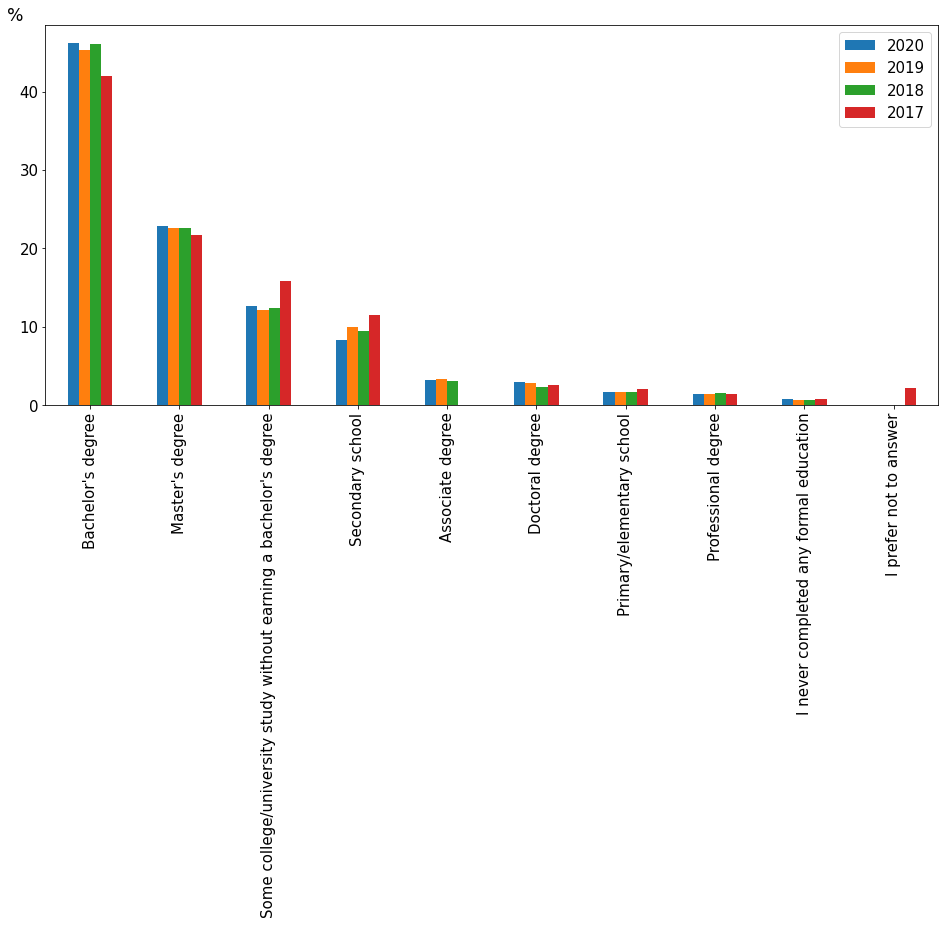

In [190]:
ax = df.plot(kind='bar', figsize=(16,7), fontsize=15)
ax.set_ylabel(ylabel="%", fontsize='xx-large', position=(0,1), rotation='horizontal')
ax.legend(fontsize=15)

## Deployment:
**Final report:**  
Data was organized and visualized for answering the question of interest.  
The distribution of the educational levels is almost identical for the last 4 years.

**Final presentation:**  
All the results will be conveyed through an article on Medium.  

================================================================================================

# Q2: Salary changes 2014-2020
The objective is to discover how the salaries of people working in IT changed in recent 7 years.

## Assessing the data

## Data understanding regarding Q2:
**Data exploration report:**  
* df2014 has the field 'Including bonus, what is your annual compensation in USD?'
* df2015 has the field 'Compensation: midpoint'
* df2016 has the field 'salary_midpoint'
* df2017 has the field 'Salary'  
* df2018 has the field 'ConvertedSalary'
* df2019 has the field 'ConvertedComp'
* df2020 has the field 'ConvertedComp'

These are the fields which are necessary to answer the question of interest.

In [191]:
print(df2014['Including bonus, what is your annual compensation in USD?'].isna().sum(), 
      'out of', df2014.shape[0], '\n',
      df2015['Compensation: midpoint'].isna().sum(), 'out of', df2015.shape[0], '\n',
      df2016['salary_midpoint'].isna().sum(), 'out of', df2016.shape[0], '\n',
      df2017['Salary'].isna().sum(), 'out of', df2017.shape[0], '\n',
      df2018['ConvertedSalary'].isna().sum(), 'out of', df2018.shape[0], '\n',
      df2019['ConvertedComp'].isna().sum(), 'out of', df2019.shape[0], '\n',
      df2020['ConvertedComp'].isna().sum(), 'out of', df2020.shape[0])

743 out of 7644 
 6605 out of 26086 
 14288 out of 56030 
 38501 out of 51392 
 51153 out of 98855 
 33060 out of 88883 
 29705 out of 64461


In [192]:
print('2014:', set(df2014['Including bonus, what is your annual compensation in USD?'].values))
print('2015:', set(df2015['Compensation: midpoint'].values))

2014: {nan, '$80,000 - $100,000', '$100,000 - $120,000', '$20,000 - $40,000', '$40,000 - $60,000', 'Rather not say', 'Student / Unemployed', '$60,000 - $80,000', '>$140,000', '$120,000 - $140,000', 'Response', '<$20,000'}
2015: {nan, 'Rather not say', '70000', '90000', '50000', '110000', 'Unemployed', '30000', '150000', '170000', '10000', '130000'}


**Data quality report:**  
* All 7 surveys have corresponding fields to answer the question of interest.
* Assuming that the respondents answered their actual income, the data has no errors.
* There is a lot of missing data, especialy in the years of 2017-2020

In general we have enough data to answer the question, but different approaches to missing data can be applied. 

**Problems to solve:**  
* Adressing missing data.
* The year 2014 has salary ranges instead of mid salaries as well as non-numerical answers like 'Unemployed' or 'Rather not say'. The year 2015 also has non-numerical answers.

## Cleaning the data

## Data Preparation for Q2
We will try two approaches:  
* First, we will drop all the missing data.
* Second, we will impute median values for missing data and for those who answered 'Rather not say'.  

Unemployed/Students can be dropped.

### The first aproach

In [193]:
def salary_convertor2014(sal):
    '''
        Performs convertion from salary ranges to mean values.
        Non-numeric responses are mapped to NaN.
        
        INPUT - a pandas series with salary ranges
    '''
    if sal == '$100,000 - $120,000':
        return 110000
    if sal == '$120,000 - $140,000':
        return 130000
    if sal == '$20,000 - $40,000':
        return 30000
    if sal == '$40,000 - $60,000':
        return 50000
    if sal == '$60,000 - $80,000':
        return 70000
    if sal == '$80,000 - $100,000':
        return 90000
    if sal == '<$20,000':
        return 10000
    if sal == '>$140,000':
        return 150000
    if sal == 'Rather not say':
        return np.nan
    if sal == 'Response':
        return np.nan
    if sal == 'Student / Unemployed':
        return np.nan

def salary_convertor2015(sal):
    '''
        Performs convertion from salary ranges to mean values.
        Non-numeric responses are mapped to NaN.
        
        INPUT - a pandas series with salary ranges
    '''
    
    if sal == 'Rather not say':
        return np.nan
    if sal == 'Unemployed':
        return np.nan
    else:
        return int(sal)
    
    
sal2014 = df2014['Including bonus, what is your annual compensation in USD?']
sal2015 = df2015['Compensation: midpoint']
sal2016 = df2016['salary_midpoint']
sal2017 = df2017['Salary']
sal2018 = df2018['ConvertedSalary']
sal2019 = df2019['ConvertedComp']
sal2020 = df2020['ConvertedComp']

**Data cleaning report:**  
`mean()` function by default ignores NaN values, so we do not drop them explicitly.  
`salary_convertor2014()` and `salary_convertor2015()` functions were prepared to deal with salary ranges and non-numerical answers.


### The second approach

In [194]:
sal2014_imputed = df2014['Including bonus, what is your annual compensation in USD?']
sal2015_imputed = df2015['Compensation: midpoint']
sal2016_imputed = df2016['salary_midpoint']
sal2017_imputed = df2017['Salary']
sal2018_imputed = df2018['ConvertedSalary']
sal2019_imputed = df2019['ConvertedComp']
sal2020_imputed = df2020['ConvertedComp']

# Deleting irrelevant entries:
sal2014_imputed = sal2014_imputed[sal2014_imputed != 'Response']
sal2014_imputed = sal2014_imputed[sal2014_imputed != 'Student / Unemployed']
sal2015_imputed = sal2015_imputed[sal2015_imputed != 'Unemployed']

# Taking care of salary ranges and non-numerical answers:
sal2014_imputed = sal2014_imputed.map(salary_convertor2014, na_action='ignore')  
sal2015_imputed = sal2015_imputed.map(salary_convertor2015, na_action='ignore')

# Imputing values
sal2014_imputed = sal2014_imputed.fillna(sal2014_imputed.median())
sal2015_imputed = sal2015_imputed.fillna(sal2015_imputed.median())
sal2016_imputed = sal2016_imputed.fillna(sal2016_imputed.median())
sal2017_imputed = sal2017_imputed.fillna(sal2017_imputed.median())
sal2018_imputed = sal2018_imputed.fillna(sal2018_imputed.median())
sal2019_imputed = sal2019_imputed.fillna(sal2019_imputed.median())
sal2020_imputed = sal2020_imputed.fillna(sal2020_imputed.median())

**Data cleaning report:**  
'Response' and 'Student / Unemployed' answers were deleted from `sal2014_imputed` and 'Unemployed' was deleted from `sal2015_imputed` because they do not contribute any valuable information regarding the question of interest.  
`mean()` and `median()` functions ignore NaN values by default.  
`salary_convertor2014()` and `salary_convertor2015()` functions were used to deal with salary ranges and non-numerical answers.  
Median values were imputed to fill in the missing data.

In [195]:
# First approach
sal2014 = sal2014.map(salary_convertor2014, na_action='ignore').mean()    
sal2015 = sal2015.map(salary_convertor2015, na_action='ignore').mean()
sal2016 = df2016['salary_midpoint'].mean()
sal2017 = df2017['Salary'].mean()
sal2018 = df2018['ConvertedSalary'].mean()
sal2019 = df2019['ConvertedComp'].mean()
sal2020 = df2020['ConvertedComp'].mean()

# Second approach
sal2014_imputed = sal2014_imputed.mean()
sal2015_imputed = sal2015_imputed.mean()
sal2016_imputed = sal2016_imputed.mean()
sal2017_imputed = sal2017_imputed.mean()
sal2018_imputed = sal2018_imputed.mean()
sal2019_imputed = sal2019_imputed.mean()
sal2020_imputed = sal2020_imputed.mean()

**Aggregations:**  
We calculate the mean value of reported salaries in each year for both approaches.

In [196]:
sal_df = pd.Series([sal2014, sal2015, sal2016, sal2017, sal2018, sal2019, sal2020], 
                   index=[2014, 2015, 2016, 2017, 2018, 2019, 2020])

sal_df_imputed = pd.Series([sal2014_imputed, sal2015_imputed, sal2016_imputed, sal2017_imputed, 
                            sal2018_imputed, sal2019_imputed, sal2020_imputed], 
                          index=[2014, 2015, 2016, 2017, 2018, 2019, 2020])

**Merged data:**  
We unite all years' mean salaries into one series for both approaches.

## Analyzing

In [197]:
sal_df

2014     60205.494268
2015     54652.352426
2016     53952.973025
2017     56298.480641
2018     95780.861788
2019    127110.738423
2020    103756.050150
dtype: float64

In [198]:
sal_df_imputed

2014     57262.931034
2015     52869.240349
2016     51669.908977
2017     51579.890137
2018     74717.415851
2019    101139.823937
2020     80849.984083
dtype: float64

We obtained 2 tables which clearly show the mean salaries per each year for each approach.  
There is a small difference in numbers, but the overall pattern did not change.

## Visualization

Text(0, 1, '$')

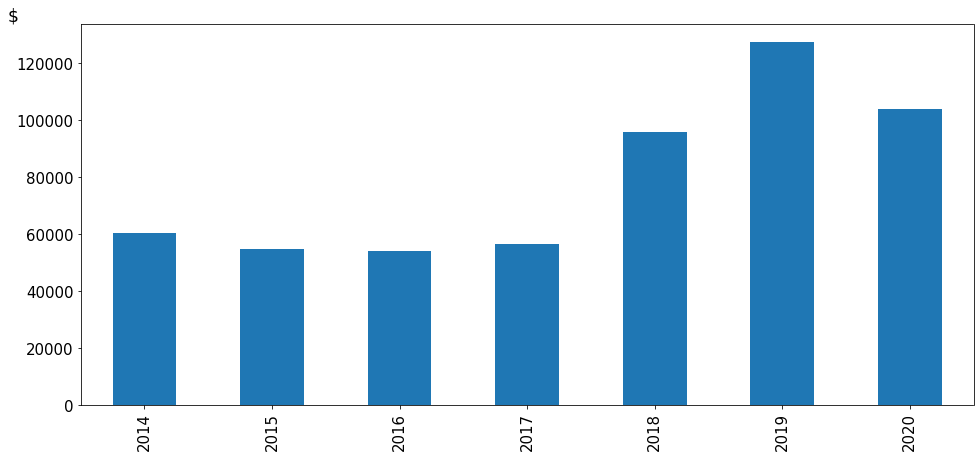

In [199]:
ax = sal_df.plot(kind='bar', figsize=(16,7), fontsize=15)
ax.set_ylabel(ylabel="$", fontsize='xx-large', position=(0,1), rotation='horizontal')

Text(0, 1, '$')

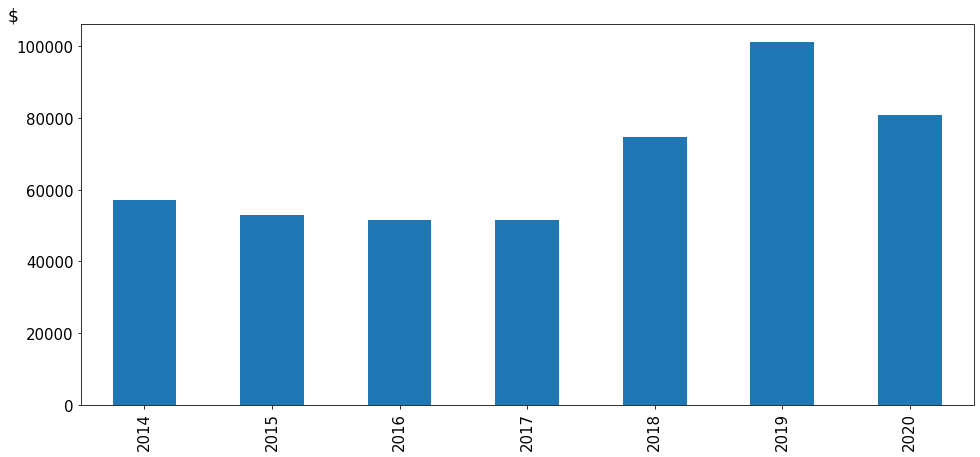

In [200]:
ax = sal_df_imputed.plot(kind='bar', figsize=(16,7), fontsize=15)
ax.set_ylabel(ylabel="$", fontsize='xx-large', position=(0,1), rotation='horizontal')

## Deployment:
**Final report:**  
Data was organized and visualized for answering the question of interest.  
Two approaches were applied: one with the missing values deleted from the dataset, second - with median value imputed to fill in the missing values. The overall pattern is the same for both approaches -
in the first 4 years, the salaries were approximately on the same level. Starting from 2018, there is a major raise in salaries with it's peak in 2019.

**Final presentation:**  
All the results will be conveyed through an article on Medium.  

================================================================================================

# Q3: Languages popularity 2014-2020
The objective is to discover which programming languages were popular in the last 7 years.

## Data understanding regarding Q3:
**Data exploration report:**  
* df2014 has the field 'Which of the following languages or technologies have you used significantly in the past year?' and subfields with each specific language.
* df2015 has the number of fieds from  'Current Lang & Tech: Android' to 'Current Lang & Tech: Write-In'.
* df2016 has the field 'tech_do' wich contains semicolon separated technologies used by each respondent.
* df2017 has the field 'HaveWorkedLanguage' wich contains semicolon separated technologies used by each respondent.  
* df2018 has the field 'LanguageWorkedWith' wich contains semicolon separated technologies used by each respondent.  
* df2019 has the field 'LanguageWorkedWith' wich contains semicolon separated technologies used by each respondent.  
* df2020 has the field 'LanguageWorkedWith' wich contains semicolon separated technologies used by each respondent.  

These are the fields which are necessary to answer the question of interest.

In [201]:
lang2014 = df2014.loc[:,'Which of the following languages or technologies have you used significantly in the past year?':
                        'Which technologies are you excited about?']
lang2014 = lang2014.drop('Which technologies are you excited about?', axis=1)
lang2014

,Which of the following languages or technologies have you used significantly in the past year?,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53
0,C,C++,C#,Java,JavaScript,Node.js,Objective-C,PHP,Python,Ruby,SQL,Other (please specify)
1,NaN,NaN,NaN,Java,JavaScript,NaN,NaN,PHP,Python,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHP,NaN,NaN,NaN,NaN
3,NaN,NaN,C#,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,SQL,NaN
4,NaN,C++,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7639,C,C++,NaN,Java,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN
7640,NaN,NaN,C#,NaN,JavaScript,NaN,Objective-C,NaN,NaN,NaN,SQL,NaN
7641,NaN,NaN,NaN,Java,JavaScript,NaN,NaN,NaN,NaN,NaN,SQL,Groovy
7642,NaN,NaN,C#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VB.NET


In [202]:
lang2015 = df2015.loc[:,'Current Lang & Tech: Android':'Current Lang & Tech: Write-In']
lang2015

,Current Lang & Tech: Android,Current Lang & Tech: Arduino,Current Lang & Tech: AngularJS,Current Lang & Tech: C,Current Lang & Tech: C++,Current Lang & Tech: C++11,Current Lang & Tech: C#,Current Lang & Tech: Cassandra,Current Lang & Tech: CoffeeScript,Current Lang & Tech: Cordova,...,Current Lang & Tech: Scala,Current Lang & Tech: Sharepoint,Current Lang & Tech: Spark,Current Lang & Tech: SQL,Current Lang & Tech: SQL Server,Current Lang & Tech: Swift,Current Lang & Tech: Visual Basic,Current Lang & Tech: Windows Phone,Current Lang & Tech: Wordpress,Current Lang & Tech: Write-In
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Scala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,C#,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,C#,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,SQL,NaN,NaN,NaN,NaN,NaN,lua
4,NaN,NaN,NaN,NaN,NaN,NaN,C#,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
print(df2016['tech_do'].isna().sum(), 'out of', df2016.shape[0], '\n',
      df2017['HaveWorkedLanguage'].isna().sum(), 'out of', df2017.shape[0], '\n',  
      df2018['LanguageWorkedWith'].isna().sum(), 'out of', df2018.shape[0], '\n',  
      df2019['LanguageWorkedWith'].isna().sum(), 'out of', df2019.shape[0], '\n',  
      df2020['LanguageWorkedWith'].isna().sum(), 'out of', df2020.shape[0])

7005 out of 56030 
 14767 out of 51392 
 20521 out of 98855 
 1314 out of 88883 
 7083 out of 64461


**Data quality report:**  
* All 7 surveys have corresponding fields to answer the question of interest.
* Assuming that the respondents reported the actual languages they used, the data has no errors.
* Missing data in the from of NaNs in the years 2014-2015 denotes that certain technology wasn't used by the respondent. The years 2016-2018 have a relatively low amount of missing data, besides, there is no way to correctly assume the programming languages that were used by those who did not report them.

In general, we have enough data to answer the question. 

**Problems to solve:**  
* The year 2014 field of interest has subfields for each programming language, so some transformation is required.
* The years 2014-2016 have some technologies other than programming languages under the fields of interest, so some filtering is required.
* Certain transformation of data is required to address semicolon separated values in the years of 2016-2020
* In some cases, names do not align, so unification is required.

## Cleaning the data

## Data Preparation for Q3
The point of our interest is only the fields in each dataframe with programming languages used by the respondents, so all other fields can be excluded.  

In [204]:
set_of_languages = {'C', 'C++', 'C++11', 'C#', 'Java', 'JavaScript', 'Objective-C', 'PHP', 'Python', 'Ruby', 'SQL',
                    'CoffeeScript', 'Clojure', 'Dart', 'F#', 'Go', 'Haskell', 'Matlab', 'Perl', 'R', 'Rust', 'Scala', 
                    'Swift', 'Visual Basic', 'Other'}

def filter_languages(ser, set_of_lang):
    '''
    INPUT
        series - a pandas series which may contain languages and other tech
        set_of_lang - a list of programming languages
    OUTPUT
        filtered_ser - a pandas series which contains only languages
    '''
    filtered_ser = ser
    for idx in filtered_ser.index:
        if idx not in set_of_lang:
            filtered_ser.drop(idx, inplace=True)
    return filtered_ser

In [205]:
lang2014 = df2014.loc[:,'Which of the following languages or technologies have you used significantly in the past year?':
                        'Which technologies are you excited about?']
lang2014 = lang2014.drop('Which technologies are you excited about?', axis=1)
lang2014.columns = lang2014.iloc[0]
lang2014 = lang2014.iloc[1:]
columns = list(lang2014.columns)
columns[-1] = 'Other'
lang2014.columns = columns
#other2014 = lang2014['Other (please specify)'] # Save others into separate series for later counting
#lang2014 = lang2014.loc[:,'C':'SQL']
lang2014

,C,C++,C#,Java,JavaScript,Node.js,Objective-C,PHP,Python,Ruby,SQL,Other
1,NaN,NaN,NaN,Java,JavaScript,NaN,NaN,PHP,Python,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHP,NaN,NaN,NaN,NaN
3,NaN,NaN,C#,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,SQL,NaN
4,NaN,C++,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,Java,JavaScript,NaN,NaN,NaN,NaN,NaN,SQL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7639,C,C++,NaN,Java,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN
7640,NaN,NaN,C#,NaN,JavaScript,NaN,Objective-C,NaN,NaN,NaN,SQL,NaN
7641,NaN,NaN,NaN,Java,JavaScript,NaN,NaN,NaN,NaN,NaN,SQL,Groovy
7642,NaN,NaN,C#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VB.NET


In [206]:
lang2015 = df2015.loc[:,'Current Lang & Tech: Android':'Current Lang & Tech: Write-In']
#other2015 = lang2015['Current Lang & Tech: Write-In'] # Save others into separate series for later counting
#lang2015 = lang2015.loc[:,'Current Lang & Tech: Android':'Current Lang & Tech: Wordpress']

columns = list(lang2015.columns) # Editing columns to make it uniform with other data
for i in range(len(columns)):    
    colon_pos = columns[i].find(':')
    columns[i] = columns[i][colon_pos+2:]
columns[-1] = 'Other'
lang2015.columns = columns
lang2015

,Android,Arduino,AngularJS,C,C++,C++11,C#,Cassandra,CoffeeScript,Cordova,...,Scala,Sharepoint,Spark,SQL,SQL Server,Swift,Visual Basic,Windows Phone,Wordpress,Other
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Scala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,C#,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,C#,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,SQL,NaN,NaN,NaN,NaN,NaN,lua
4,NaN,NaN,NaN,NaN,NaN,NaN,C#,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
lang2016 = df2016['tech_do'] 

**Data cleaning report:**  
* A new dataframe was created for the year 2014, with each column denoting certain programming language.
* A new dataframe was created for the year 2015, with each column denoting certain programming language. Also, certain naming inconsistencies were removed.
* `filter_languages()` function was created to drop technologies that are not considered programming languages.
* There is still some cleaning to be done on the dataframes for the years of 2016-2020, but it is better to wait until the data is aggregated.

In [208]:
lang2014 = lang2014.count()
lang2014 = filter_languages(lang2014, set_of_languages) #List of languages included a framework so needed filtering
lang2014 = lang2014 / lang2014.sum()
lang2014.name = 2014
lang2014

C              0.057135
C++            0.069009
C#             0.115729
Java           0.120644
JavaScript     0.184106
Objective-C    0.032850
PHP            0.083220
Python         0.071686
Ruby           0.028859
SQL            0.168727
Other          0.068036
Name: 2014, dtype: float64

In [209]:
lang2015 = lang2015.count()
lang2015 = filter_languages(lang2015, set_of_languages) #List of languages included other technologies so needed filtering
lang2015 = lang2015 / lang2015.sum()
lang2015.name = '2015'
lang2015

C               0.050535
C++             0.063365
C++11           0.025897
C#              0.097223
CoffeeScript    0.010955
Clojure         0.002462
Dart            0.001525
F#              0.002434
Go              0.006464
Haskell         0.004995
Java            0.114991
JavaScript      0.167359
Matlab          0.012032
Objective-C     0.024050
Perl            0.010325
PHP             0.091347
Python          0.073284
R               0.010563
Ruby            0.024694
Rust            0.001441
Scala           0.007527
SQL             0.132060
Swift           0.010619
Visual Basic    0.023799
Other           0.030052
Name: 2015, dtype: float64

In [210]:
def separate_items(series, delimiter, dtype='object'):
    '''
    INPUT
        series - a pandas series with values to separate
        delimiter - a token that separates values
        dtype - a dtype of values 
    OUTPUT
        separated_ser - a pandas series with separated values
    '''

    separated_ser = pd.Series(np.nan, index=range(len(series)), dtype=dtype)
    for i in range(len(separated_ser)):
        if series[i] is not np.nan:
            separated_ser[i] = series[i].split(delimiter)
        else:
            separated_ser[i] = series[i]
    separated_ser.dropna(inplace=True)
    return separated_ser

def count_values(series):
    '''
    INPUT
        series - a pandas series with lists of objects
    OUTPUT
        possible_values - a set of all unique values in the given series
    '''
    possible_values = set()
    for item in series.values:
        possible_values = possible_values.union(set(item))

    series_count = pd.Series(0, index=possible_values, dtype='int')
    for item in series.values:
        for lang in item:
            series_count[lang] = series_count[lang] + 1
    return series_count            

    
lang2016 = separate_items(lang2016, "; ")
lang2016 = count_values(lang2016)
lang2016 = filter_languages(lang2016, set_of_languages) #List of languages included other technologies so needed filtering
lang2016 = lang2016 / lang2016.sum()
lang2016.name = '2016'
lang2016

Swift           0.018217
C++             0.063614
F#              0.003211
Dart            0.001473
Objective-C     0.021242
JavaScript      0.181673
C               0.050936
Matlab          0.010628
R               0.010827
Perl            0.010774
Scala           0.010628
Rust            0.002892
CoffeeScript    0.011026
Ruby            0.029077
SQL             0.145789
Java            0.119028
Clojure         0.003689
C#              0.101388
Go              0.010263
Visual Basic    0.021972
PHP             0.084783
Haskell         0.005393
Python          0.081479
Name: 2016, dtype: float64

In [211]:
def assemble_list_of_technologies(df, fields, delim):
    '''
    INPUT
        df - a dataframe from which to extract values
        fields - a list of column names in df that denote languages, frameworks, databases, platforms and other
        technologies worked with in the given year
        delim - delimeter that separates values in each column
    OUTPUT
        result - a pandas series with languages, frameworks, databases and platforms as index and the count of users as values
    '''

    result = pd.Series(dtype='int')
    
    for field in fields:
        tech = df[field]
        tech = separate_items(tech, delim)
        tech = count_values(tech)
        result = result.append(tech)
        
    return result

In [212]:
lang2017 = assemble_list_of_technologies(df2017, ['HaveWorkedLanguage'], "; ")
lang2017.rename({"Visual Basic 6": "Visual Basic"}, inplace=True) # Some extra work to make this data uniform with the previous years
lang2017 = lang2017 / lang2017.sum()
lang2017.name = 2017
lang2017

Elixir          0.002740
TypeScript      0.025154
Swift           0.017077
C++             0.058811
F#              0.003296
Dart            0.001046
Smalltalk       0.002358
Groovy          0.008604
Objective-C     0.016940
Matlab          0.011315
JavaScript      0.164967
R               0.011784
C               0.050294
Assembly        0.013147
VBA             0.011351
Common Lisp     0.001969
Julia           0.000995
VB.NET          0.016392
Hack            0.000772
Perl            0.011431
Scala           0.009440
Rust            0.003000
CoffeeScript    0.008596
Ruby            0.023972
SQL             0.135248
Lua             0.007493
Java            0.104742
Clojure         0.002820
Visual Basic    0.007724
C#              0.089973
Go              0.011229
Erlang          0.002026
Python          0.084405
Haskell         0.004680
PHP             0.074208
Name: 2017, dtype: float64

In [213]:
lang2018 = assemble_list_of_technologies(df2018, ['LanguageWorkedWith'], ";")
lang2018 = lang2018 / lang2018.sum()
lang2018.name = 2018

#Some extra work to make this data uniform with the previous years
lang2018['HTML'] = lang2018['HTML'] + lang2018['CSS']
lang2018.drop('CSS', inplace=True)
lang2018.rename({"Visual Basic 6": "Visual Basic"}, inplace=True)
lang2018.rename({"HTML": "HTML/CSS"}, inplace=True)

lang2018

TypeScript              0.028056
Swift                   0.012992
C++                     0.040917
F#                      0.002296
Ocaml                   0.000968
Groovy                  0.006945
Objective-C             0.011345
JavaScript              0.112600
Matlab                  0.009397
R                       0.009910
C                       0.037149
Assembly                0.011860
Julia                   0.000885
VBA                     0.007845
Cobol                   0.001215
VB.NET                  0.010818
Hack                    0.000523
Perl                    0.006754
Scala                   0.007042
Rust                    0.003824
CoffeeScript            0.005360
Ruby                    0.016289
SQL                     0.091976
Lua                     0.005627
Java                    0.073138
Visual Basic            0.006356
Clojure                 0.002125
Kotlin                  0.007223
C#                      0.055499
Go                      0.011390
Bash/Shell

In [214]:
lang2019 = assemble_list_of_technologies(df2019, ['LanguageWorkedWith'], ";")
lang2019 = lang2019 / lang2019.sum()
lang2019.name = 2019

#Some extra work to make this data uniform with the previous years
lang2019.rename({"Other(s):": "Other"}, inplace=True)
lang2019.rename({"Bash/Shell/PowerShell": "Bash/Shell"}, inplace=True)

lang2019

Elixir         0.002860
TypeScript     0.042049
Other          0.017979
Swift          0.013040
Ruby           0.016642
C++            0.046592
F#             0.002209
Dart           0.003821
SQL            0.107931
Java           0.081536
Clojure        0.002847
Kotlin         0.012758
Objective-C    0.009514
VBA            0.010853
JavaScript     0.134434
R              0.011460
C              0.040901
Bash/Shell     0.072623
Assembly       0.013242
C#             0.061513
Go             0.016347
PHP            0.052281
HTML/CSS       0.125915
WebAssembly    0.002304
Erlang         0.001764
Python         0.082730
Scala          0.007512
Rust           0.006343
Name: 2019, dtype: float64

In [215]:
lang2020 = assemble_list_of_technologies(df2020, ['LanguageWorkedWith'], ";")
lang2020 = lang2020 / lang2020.sum()
lang2020.name = 2020

#Some extra work to make this data uniform with the previous years
lang2020.rename({"Bash/Shell/PowerShell": "Bash/Shell"}, inplace=True)

lang2020

TypeScript     0.050617
Swift          0.011795
Ruby           0.014048
C++            0.047593
SQL            0.109071
Dart           0.007917
Java           0.080117
Kotlin         0.015514
Objective-C    0.008125
JavaScript     0.134797
R              0.011417
C              0.043357
Bash/Shell     0.065902
VBA            0.012149
Julia          0.001802
Assembly       0.012337
C#             0.062641
Go             0.017493
PHP            0.052107
HTML/CSS       0.125627
Perl           0.006236
Python         0.087801
Scala          0.007125
Haskell        0.004243
Rust           0.010170
Name: 2020, dtype: float64

**Aggregations:**  
* The years 2014-2015 were aggregated with the built-in method `count()` to count the total number of users of each programming language.
* Two functions `separate_values()` and `count_values()` were written to count the total number of users of each programming language for the year 2016.
* A more general function `assemble_list_of_technologies()` was written to do the same for the years 2017-2020.

**Derived Values:**  
The number of users for each language was divided by the overall sum of users to obtain the percentage.

In [216]:
lang_over_years = pd.concat([lang2014, lang2015, lang2016, lang2017, lang2018, lang2019, lang2020], axis=1)
lang_over_years.fillna(0, inplace=True)
lang_over_years.columns = ['2014', '2015', '2016', '2017', '2018', '2019', '2020']
lang_over_years

,2014,2015,2016,2017,2018,2019,2020
C,0.057135,0.050535,0.050936,0.050294,0.037149,0.040901,0.043357
C++,0.069009,0.063365,0.063614,0.058811,0.040917,0.046592,0.047593
C#,0.115729,0.097223,0.101388,0.089973,0.055499,0.061513,0.062641
Java,0.120644,0.114991,0.119028,0.104742,0.073138,0.081536,0.080117
JavaScript,0.184106,0.167359,0.181673,0.164967,0.112600,0.134434,0.134797
Objective-C,0.032850,0.024050,0.021242,0.016940,0.011345,0.009514,0.008125
PHP,0.083220,0.091347,0.084783,0.074208,0.049563,0.052281,0.052107
Python,0.071686,0.073284,0.081479,0.084405,0.062510,0.082730,0.087801
Ruby,0.028859,0.024694,0.029077,0.023972,0.016289,0.016642,0.014048
SQL,0.168727,0.132060,0.145789,0.135248,0.091976,0.107931,0.109071


**Merging:**  
All the results were merged into one dataframe which shows the popularity of each language in percents per year.

## Visualisation

In [217]:
lang_over_years.sort_values(by='2018', ascending=False, inplace=True) # Sorting values for better presentation

lang_over_years1 = lang_over_years.head(23) # Divide the list into two parts for more convinient presentation
lang_over_years2 = lang_over_years.tail(22)

Text(0, 1, '%')

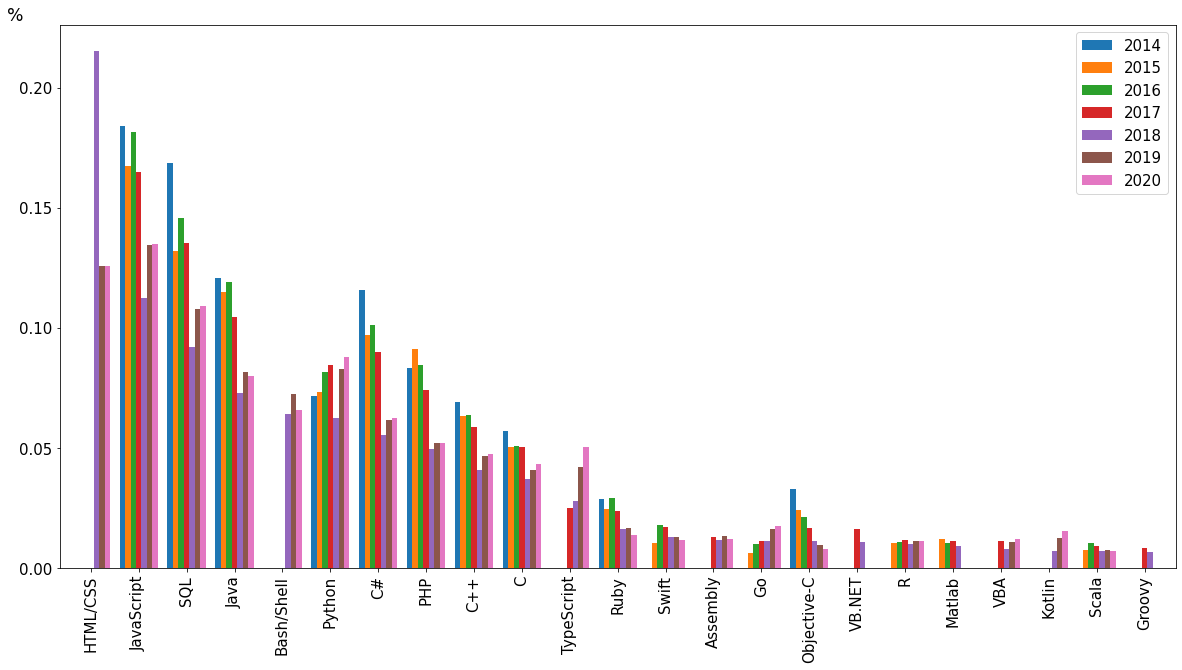

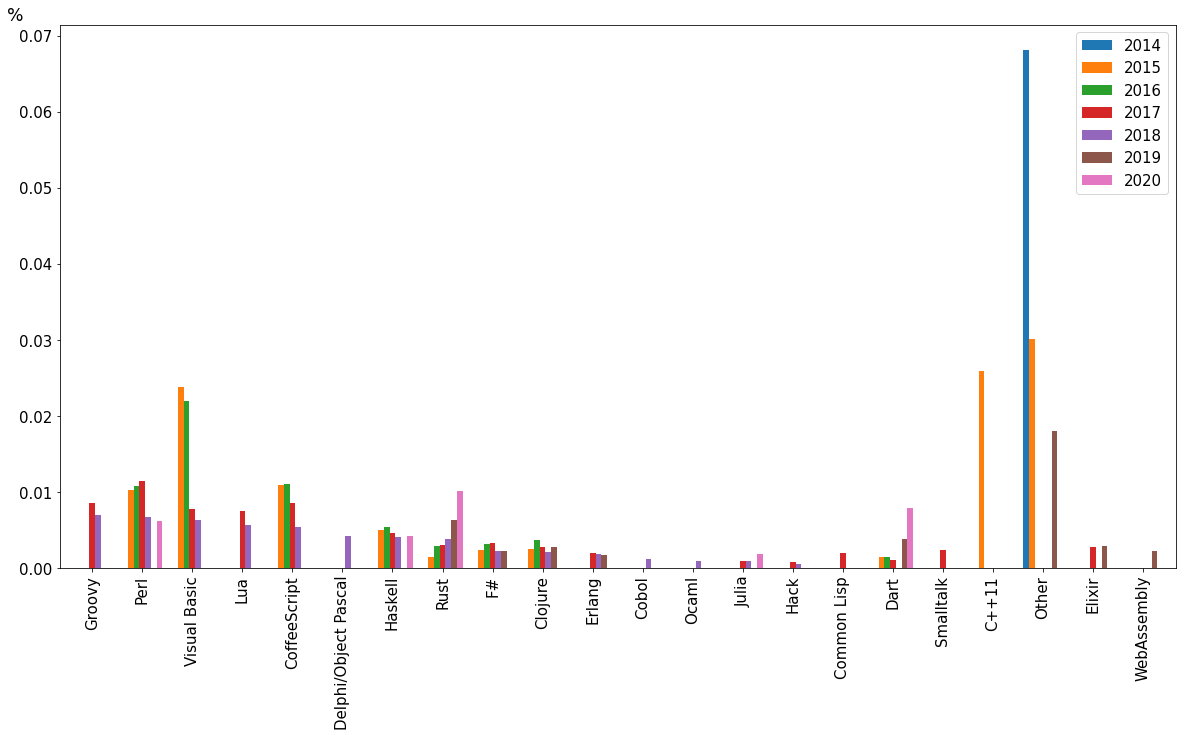

In [218]:
ax = lang_over_years1.plot(kind='bar', figsize=(20,10), width=0.8, fontsize=15)
ax.legend(fontsize=15)
ax.set_ylabel(ylabel="%", fontsize='xx-large', position=(0,1), rotation='horizontal')
ax = lang_over_years2.plot(kind='bar', figsize=(20,10), width=0.8, fontsize=15)
ax.legend(fontsize=15)
ax.set_ylabel(ylabel="%", fontsize='xx-large', position=(0,1), rotation='horizontal')

## Deployment:
**Final report:**  
The data was organized and visualized for answering the question of interest.  
JavaScript is holding the leading position in all years (we don't count HTML/CSS as a programming lanuage). SQL is very popular, but it's not a general purpose language. The second place is shared (approximately) by Python and Java. C/C++/C# and PHP are also quite popular, but in the last 3 years their popularity have been decreasing. It's worth to mention that Bash/Shell scripting is also a frequently used skill.

**Final presentation:**  
All the results will be conveyed through an article on Medium.  

================================================================================================